# Network (base on user mentioned column)

In this notebook, we will investigate the network of politicians based on who mentioned whom in tweets.

## 1. Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

## 2. Reading data

In [2]:
df = pd.read_parquet('../data/03.cleaned/df_combined.parquet')

In [3]:
df.head()

,in_reply_to_user_id,reply_settings,author_id,context_annotations,id,text,edit_controls,referenced_tweets,created_at,edit_history_tweet_ids,...,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,text_clean_demojized,emoji_count_en,emoji_count,name
0,375146901.0,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846277256509116672,"@donaldtusk Niezrealizowanie większości ze ""10...",{'editable_until': '2024-10-15 20:49:34+00:00'...,"[{'id': '1846091776269963695', 'type': 'replie...",2024-10-15 19:49:34+00:00,[1846277256509116623],...,1,33,0,1555,"Failure to implement most of the ""100 specifi...","Failure to implement most of the ""100 specifi...","Niezrealizowanie większości ze ""100 konkretów...",0,0,Bartłomiej Pejo
1,NaN,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846222583898784000,Rok po wyborach trzeba powiedzieć jedno - nie ...,{'editable_until': '2024-10-15 17:12:19+00:00'...,None,2024-10-15 16:12:19+00:00,[1846222583898784025],...,2,72,0,3031,"A year after the elections, one thing must be ...","A year after the elections, one thing must be ...",Rok po wyborach trzeba powiedzieć jedno - nie ...,0,0,Bartłomiej Pejo
2,NaN,everyone,1.182212e+09,None,1846161400328028160,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",{'editable_until': '2024-10-15 13:09:12+00:00'...,None,2024-10-15 12:09:12+00:00,[1846161400328028272],...,3,33,2,8636,"❌ We are a year after the elections, and Pola...",:cross_mark: We are a year after the election...,":cross_mark: Mamy rok po wyborach, a Polska p...",1,1,Bartłomiej Pejo
3,NaN,everyone,1.182212e+09,None,1846091824101769472,Mija rok od wyborów parlamentarnych. W kampani...,{'editable_until': '2024-10-15 08:32:44+00:00'...,None,2024-10-15 07:32:44+00:00,[1846091824101769490],...,2,38,0,2441,A year has passed since the parliamentary elec...,A year has passed since the parliamentary elec...,Mija rok od wyborów parlamentarnych. W kampani...,0,0,Bartłomiej Pejo
4,NaN,everyone,1.182212e+09,None,1846075343188144128,#Idę11 🇵 🇱 https://t.co/KiCe5ATOpX,{'editable_until': '2024-10-15 07:27:14+00:00'...,None,2024-10-15 06:27:14+00:00,[1846075343188144153],...,18,616,2,8634,#I'm going11 🇵 🇱,#I'm going11 🇵 🇱,#Idę11 🇵 🇱,2,2,Bartłomiej Pejo


In [4]:
# Extracting the columns we are interested in
df = df[['name','username','party','mentions']].copy()
df.head()

,name,username,party,mentions
0,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[@donaldtusk]
1,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[]
2,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[]
3,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[]
4,Bartłomiej Pejo,bartlomiejpejo,Konfederacja,[]


In [5]:
# Minor cleaning of deleting the @ symbol from the mentions
df['mentions'] = df['mentions'].apply(lambda x: [mention[1:] if mention.startswith('@') else mention for mention in x])

## 3. Network analysis

### 3.1. Most mentioned Users

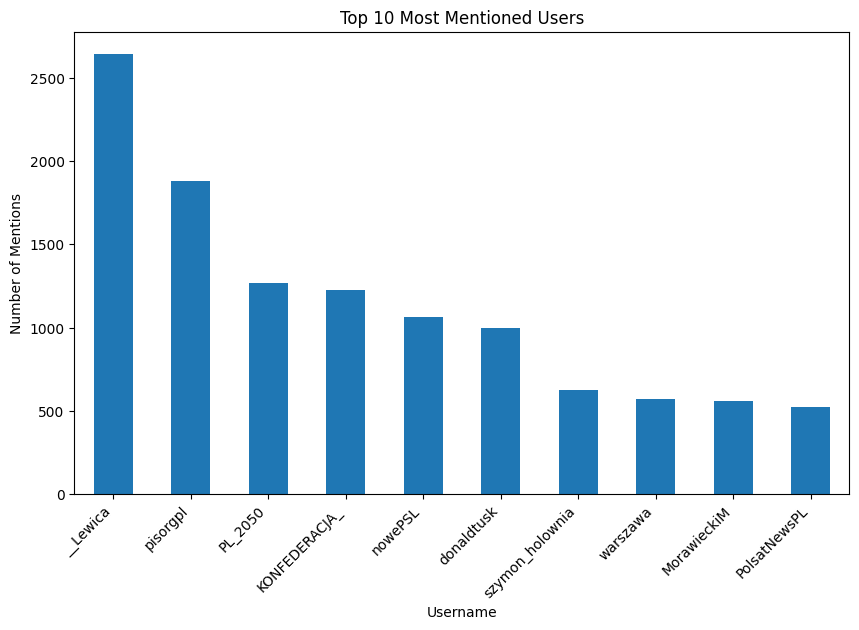

In [6]:
# Explode the mentions column to have one mention per row
mentions_exploded = df.explode('mentions')
# Count the occurrences of each mention
mention_counts = mentions_exploded['mentions'].value_counts().head(10)
# Plot the top 10 most mentioned users
mention_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Mentioned Users')
plt.xlabel('Username')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')
plt.show()

We can observe that the highest number of mentions are attributed to political parties. However, notable individuals such as Donald Tusk, Szymon Holownia, Warszawa, Mateusz Morawiecki are also frequently mentioned.

### 3.2. Most mentioned Users for each Party

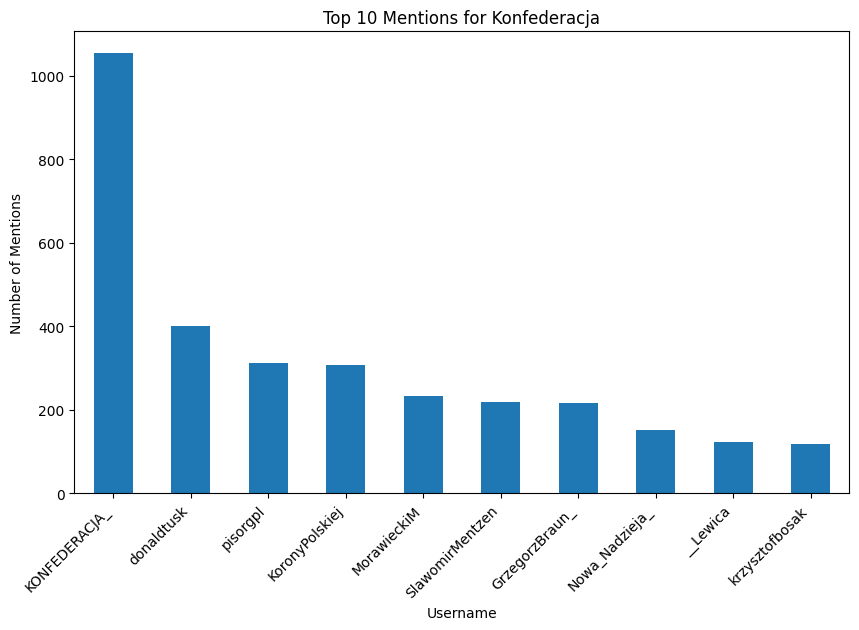

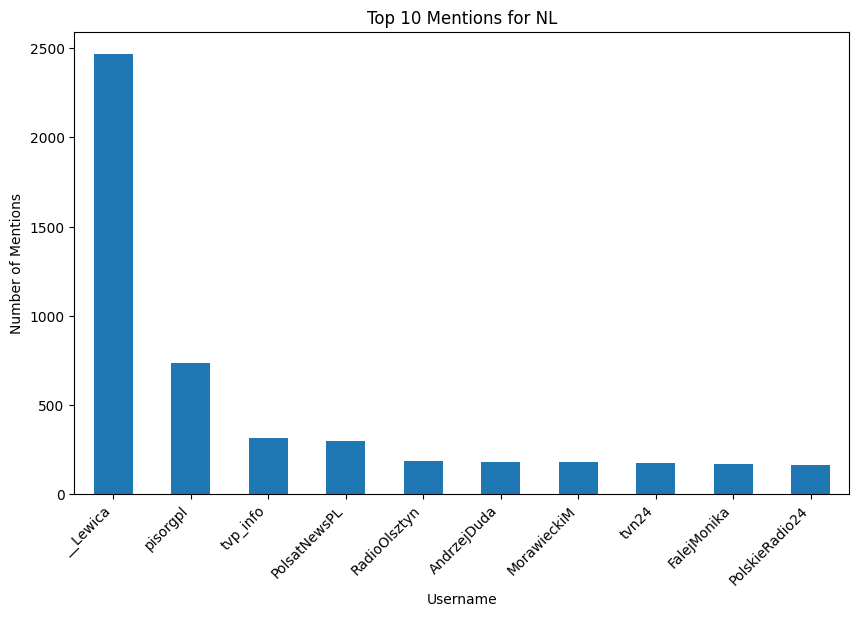

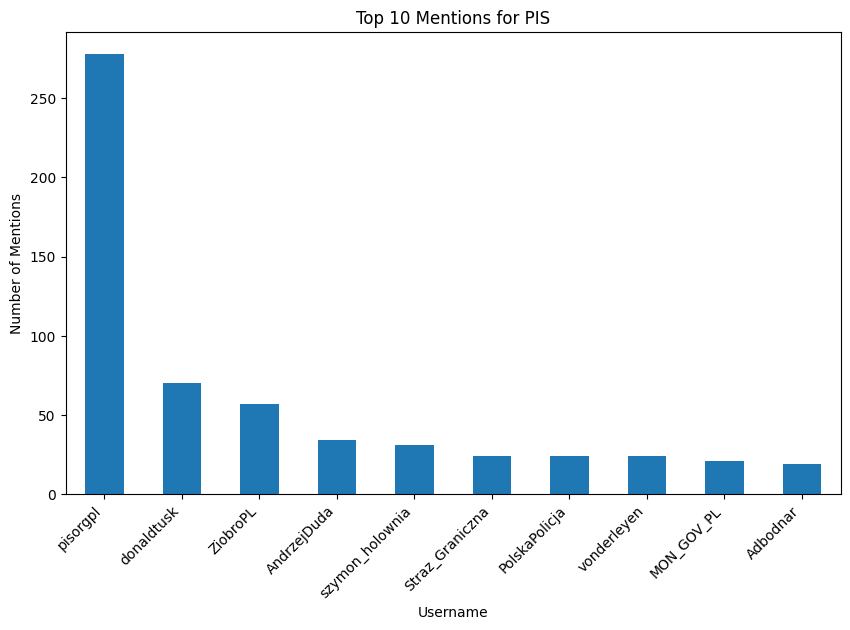

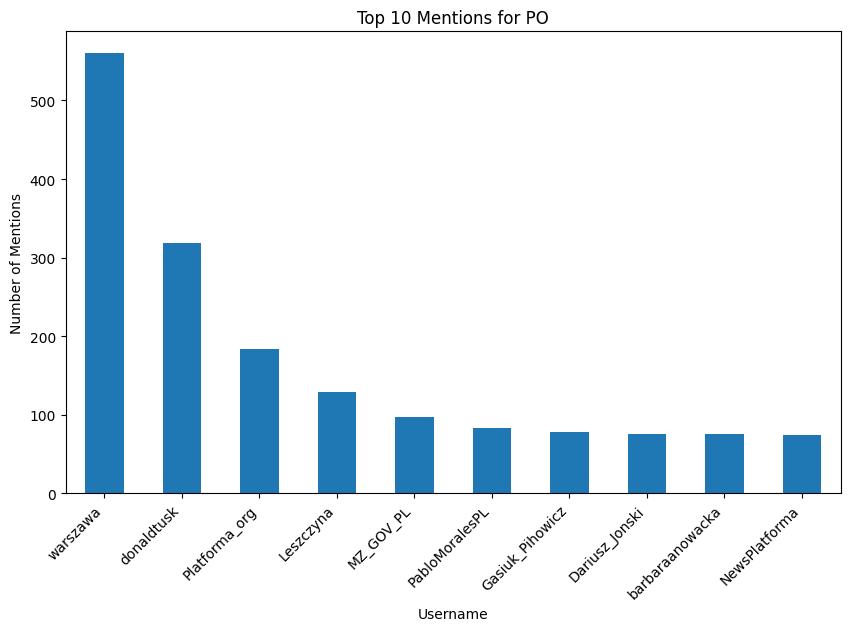

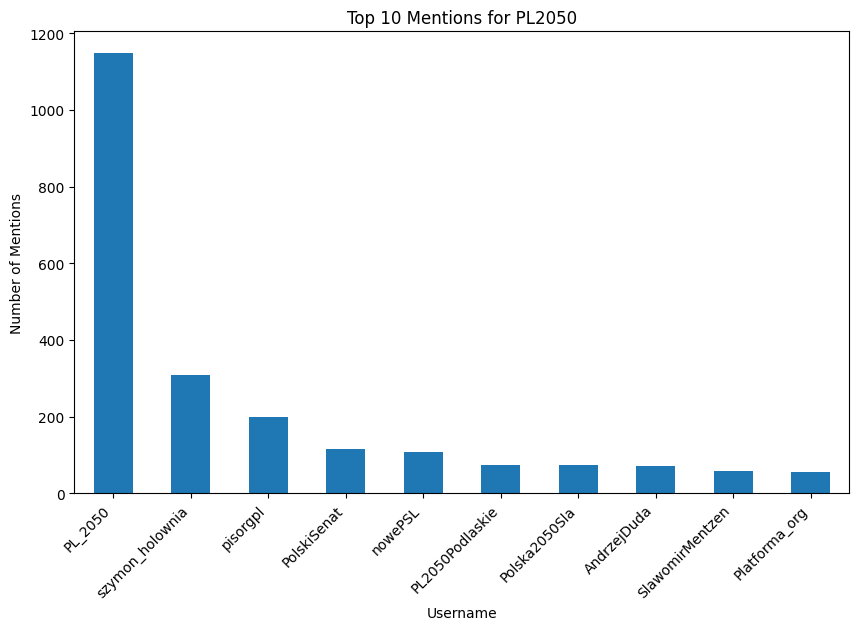

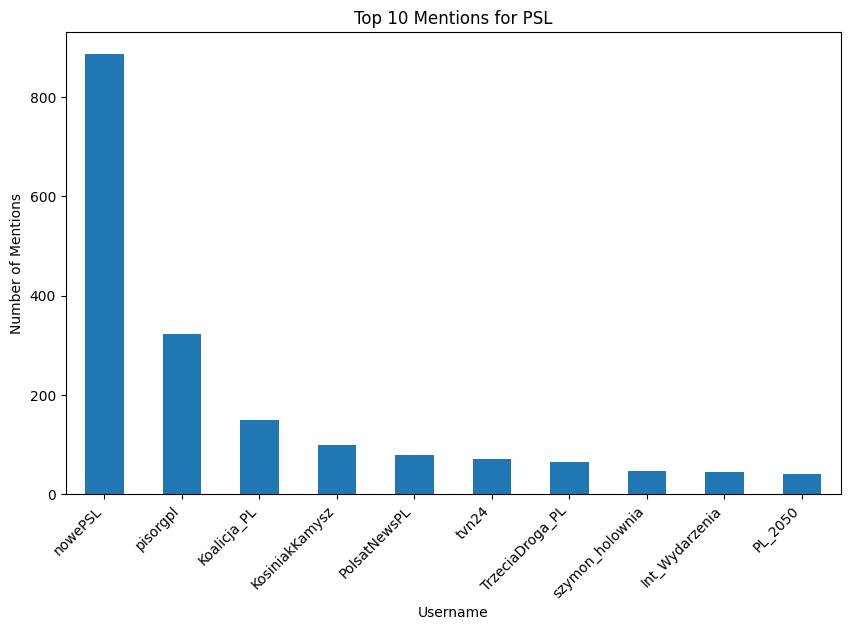

In [13]:
# Group by party and explode the mentions column
party_mentions_exploded = df.explode('mentions').dropna(subset=['mentions'])

# Create a plot for each party
parties = party_mentions_exploded['party'].unique()
for party in parties:
    party_df = party_mentions_exploded[party_mentions_exploded['party'] == party]
    mention_counts_party = party_df['mentions'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    mention_counts_party.plot(kind='bar')
    plt.title(f'Top 10 Mentions for {party}')
    plt.xlabel('Username')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=45, ha='right')
    plt.show()

For politicians from the Konfederacja coalition, we observe that apart from their political parties and members, they frequently mention Donald Tusk, Sławomir Mentzen, Grzegorz Braun and other political parties.

For Nowa Lewica politicians, apart from their political parties and members, they often mention TV stations, Andrzej Duda and Mateusz Morawiecki.

For Prawo i Sprawiedliwość, they frequently mention people from other parties such as Donald Tusk, Szymon Hołownia, Zbigniew Ziobro, and even an international figure, Ursula von der Leyen.

For Platforma Obywatelska, apart from their political parties and members, they mainly mention Warszawa, Ministry of Foreign Affair and Pablo Morales.

For Polska2050, apart from their political parties and members, they mention PiS, Andrzej Duda amd Sławomir Mentzen.

For Polskie Stronnictwo Ludowe, they mention PIS, Kolalicja and Trzecia Droga and very often TV stations.


## 4. Graph Network

#### 4.1. General

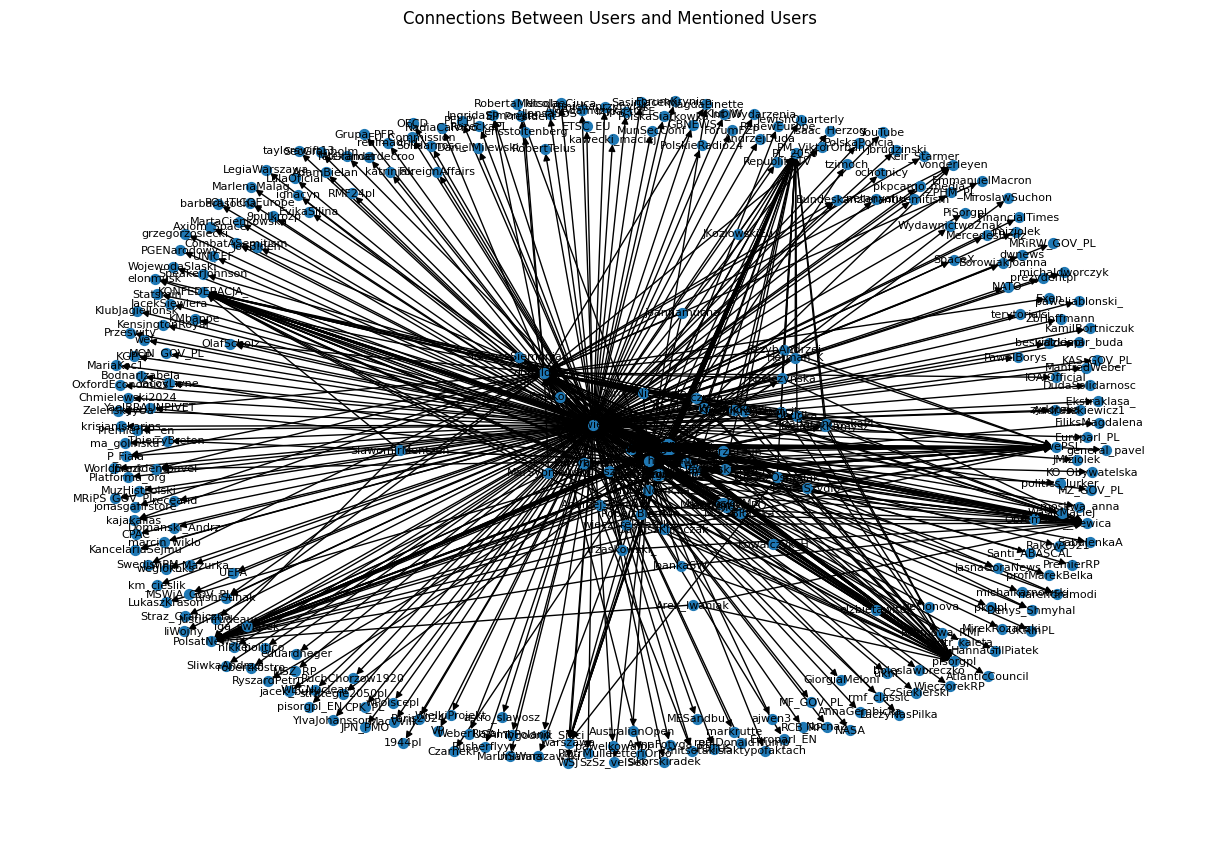

In [8]:
nodes_to_keep = list(mention_counts.head(50).index)
mentions_exploded_1 = mentions_exploded[mentions_exploded['username'].isin(nodes_to_keep) | mentions_exploded['mentions'].isin(nodes_to_keep)]
G = nx.DiGraph()

for _, row in mentions_exploded_1.dropna(subset=['mentions']).iterrows():
    G.add_edge(row['username'], row['mentions'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowsize=10)
plt.title('Connections Between Users and Mentioned Users')
plt.show()

From the graph above, it is challenging to draw any concrete conclusions. Let's narrow our focus to the politicians whose tweets were downloaded.

#### 4.2. Analysed Politicians

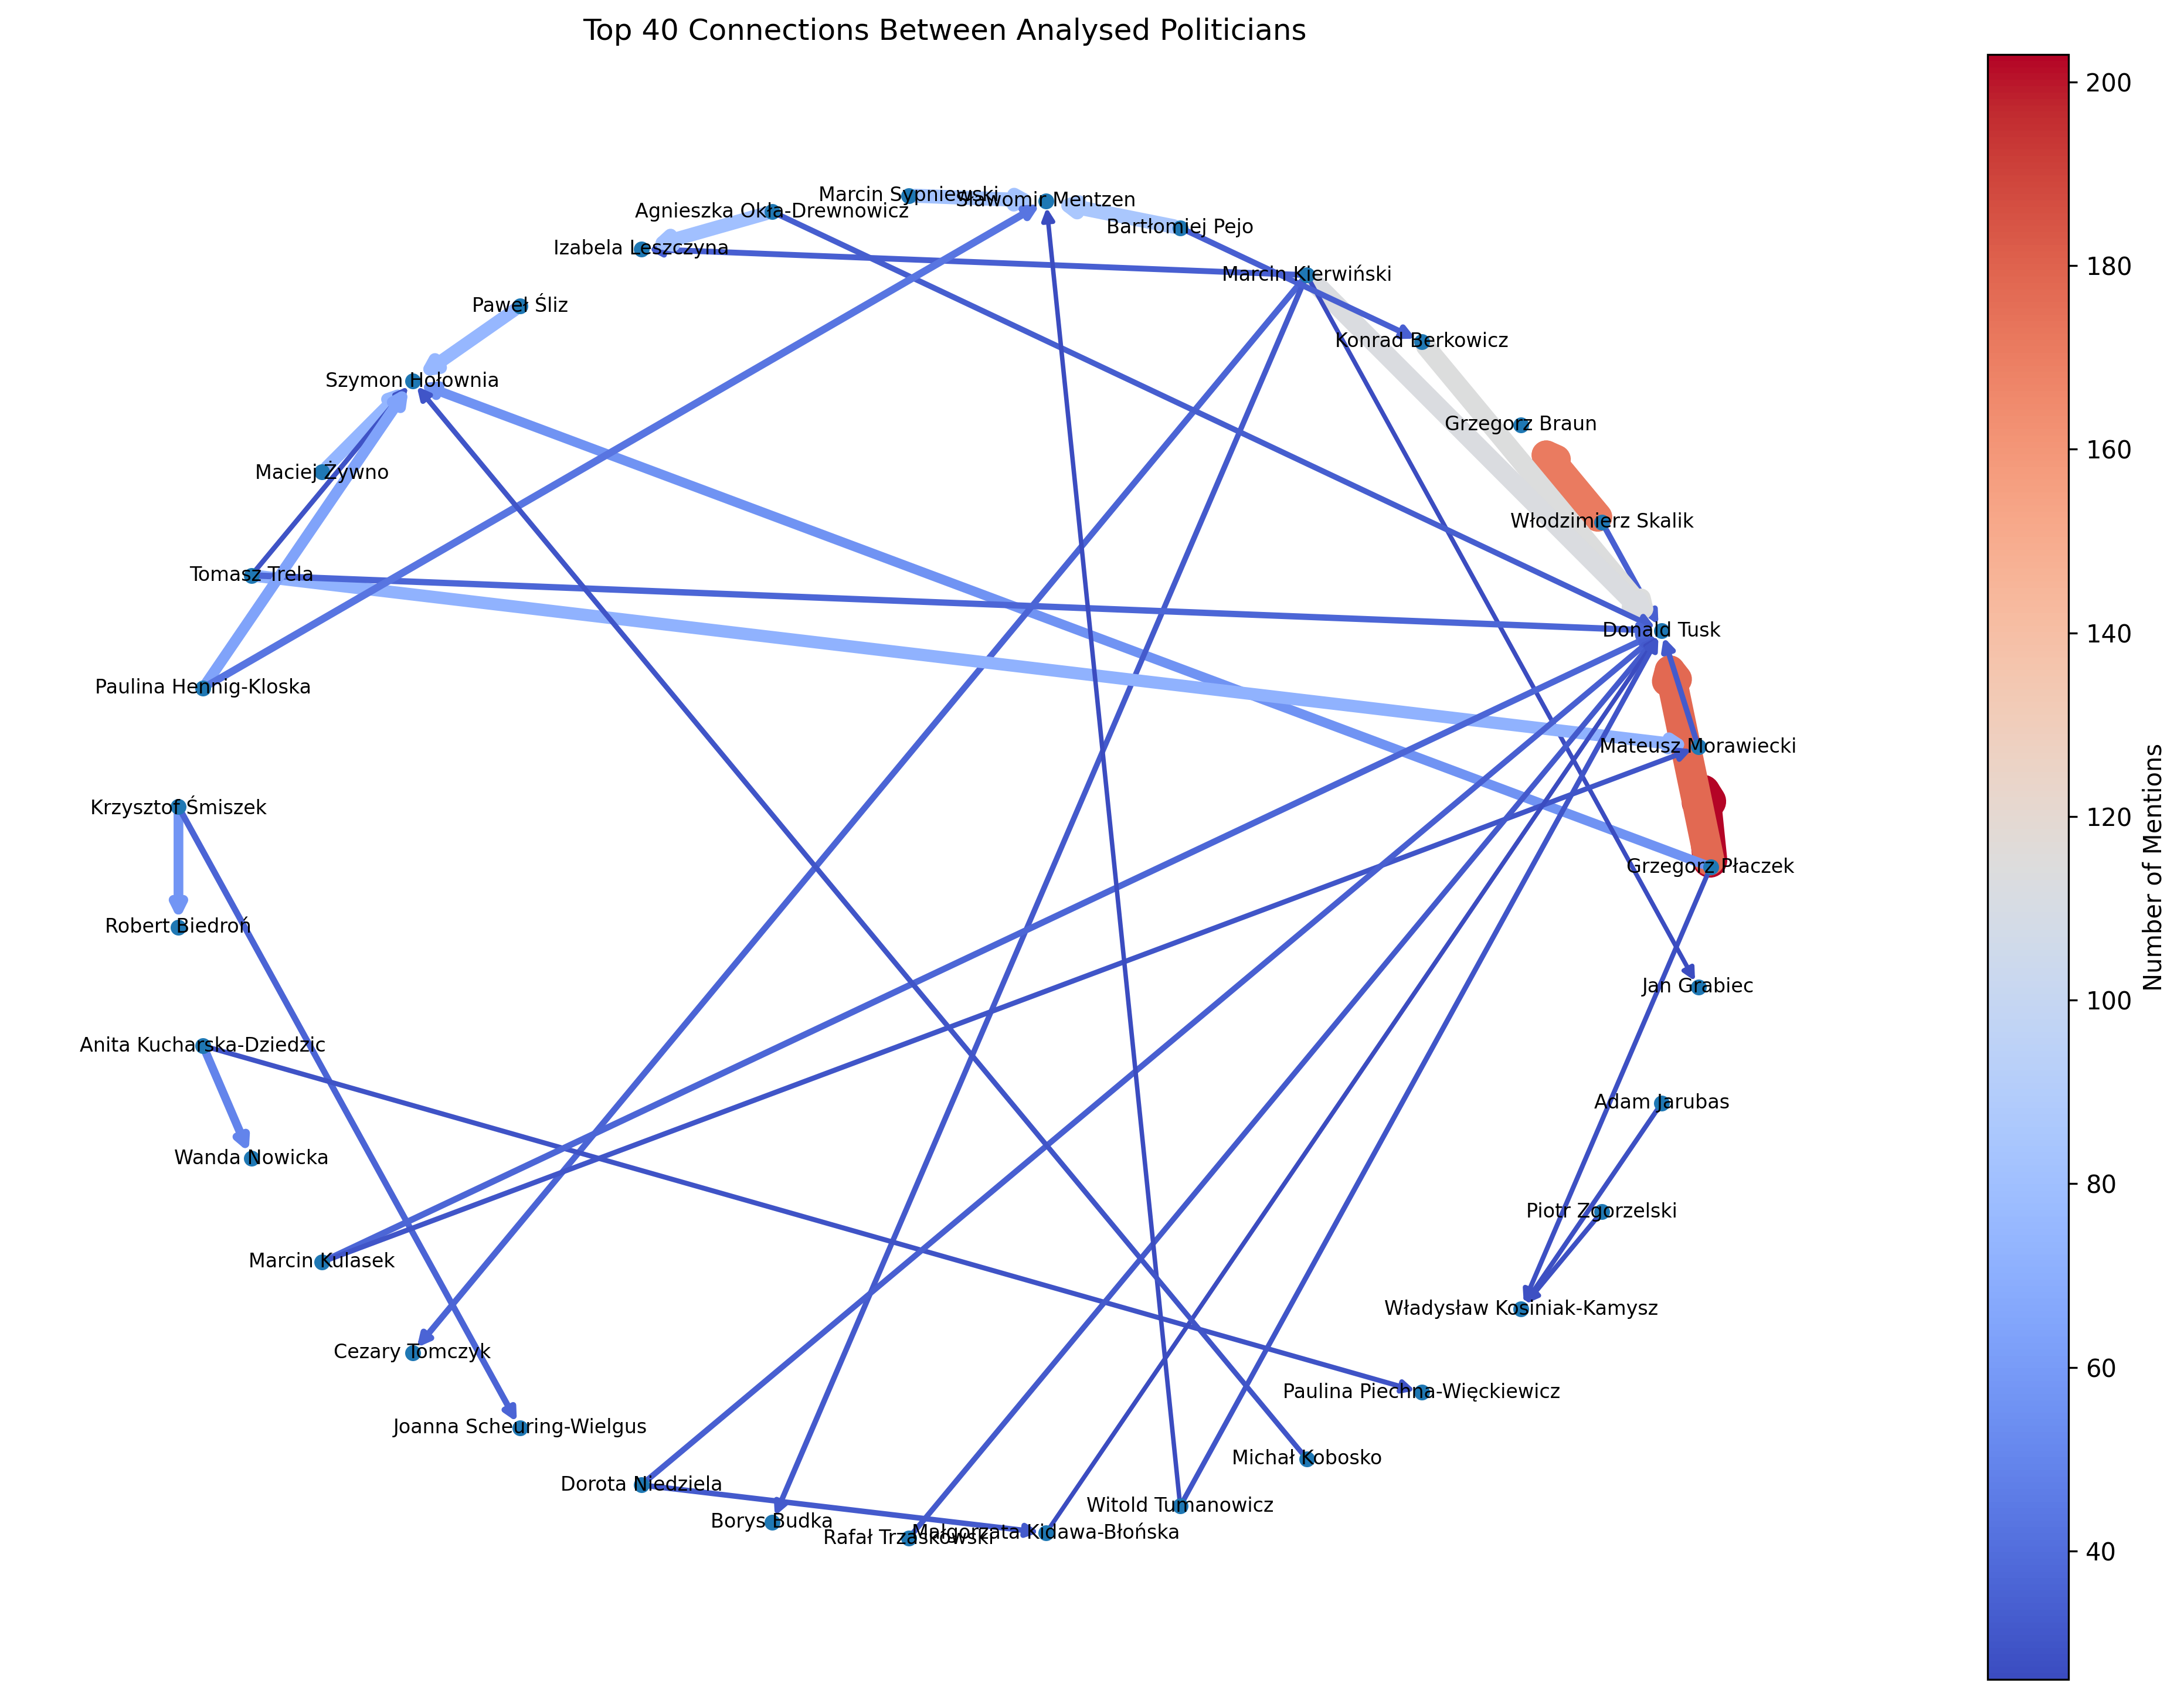

In [14]:
username_unique = mentions_exploded["username"].unique()
username_to_realname = {
    'bartlomiejpejo': 'Bartłomiej Pejo',
    'GrzegorzBraun_': 'Grzegorz Braun',
    'Iwaszkiewicz_RJ': 'Robert Iwaszkiewicz',
    'KonradBerkowicz': 'Konrad Berkowicz',
    'MarSypniewski': 'Marcin Sypniewski',
    'MichalWawer': 'Michał Wawer',
    'placzekgrzegorz': 'Grzegorz Płaczek',
    'SlawomirMentzen': 'Sławomir Mentzen',
    'TudujKrzysztof': 'Krzysztof Tuduj',
    'Wlodek_Skalik': 'Włodzimierz Skalik',
    'WTumanowicz': 'Witold Tumanowicz',
    'AndrzejSzejna': 'Andrzej Szejna',
    'AnitaKDZG': 'Anita Kucharska-Dziedzic',
    'JoankaSW': 'Joanna Scheuring-Wielgus',
    'KGawkowski': 'Krzysztof Gawkowski',
    'K_Smiszek': 'Krzysztof Śmiszek',
    'MarcinKulasek': 'Marcin Kulasek',
    'MoskwaWodnicka': 'Małgorzata Moskwa-Wodnicka',
    'PaulinaPW2024': 'Paulina Piechna-Więckiewicz',
    'poselTTrela': 'Tomasz Trela',
    'RobertBiedron': 'Robert Biedroń',
    'WandaNowicka': 'Wanda Nowicka',
    'wieczorekdarek': 'Dariusz Wieczorek',
    'wlodekczarzasty': 'Włodzimierz Czarzasty',
    'Arek_Iwaniak': 'Arkadiusz Iwaniak',
    'B_Maciejewska': 'Beata Maciejewska',
    'BeataSzydlo': 'Beata Szydło',
    'elzbietawitek': 'Elżbieta Witek',
    'Kaminski_M_': 'Mariusz Kamiński',
    'Kowalczyk_H': 'Henryk Kowalczyk',
    'Macierewicz_A': 'Antoni Macierewicz',
    'mblaszczak': 'Mariusz Błaszczak',
    'MorawieckiM': 'Mateusz Morawiecki',
    'mwojcik_': 'Michał Wójcik',
    'PatrykJaki': 'Patryk Jaki',
    'bbudka': 'Borys Budka',
    'CTomczyk': 'Cezary Tomczyk',
    'donaldtusk': 'Donald Tusk',
    'DorotaNiedziela': 'Dorota Niedziela',
    'EwaKopacz': 'Ewa Kopacz',
    'JanGrabiec': 'Jan Grabiec',
    'Konwinski_PO': 'Zbigniew Konwiński',
    'Leszczyna': 'Izabela Leszczyna',
    'MKierwinski': 'Marcin Kierwiński',
    'M_K_Blonska': 'Małgorzata Kidawa-Błońska',
    'OklaDrewnowicz': 'Agnieszka Okła-Drewnowicz',
    'trzaskowski_': 'Rafał Trzaskowski',
    'TomaszSiemoniak': 'Tomasz Siemoniak',
    'AgaBaranowskaPL': 'Agnieszka Baranowska',
    'aga_buczynska': 'Agnieszka Buczyńska',
    'hennigkloska': 'Paulina Hennig-Kloska',
    'joannamucha': 'Joanna Mucha',
    'Kpelczynska': 'Katarzyna Pełczyńska-Nałęcz',
    'LukaszOsmalak': 'Łukasz Osmalak',
    'SlizPawel': 'Paweł Śliz',
    'szymon_holownia': 'Szymon Hołownia',
    'ZalewskiPawel': 'Paweł Zalewski',
    'ZywnoMaciej': 'Maciej Żywno',
    'JKozlowskiEu': 'Jacek Kozłowski',
    'michalkobosko': 'Michał Kobosko',
    'DariuszKlimczak': 'Dariusz Klimczak',
    'GrzybAndrzej': 'Andrzej Grzyb',
    'Hetman_K': 'Krzysztof Hetman',
    'JarubasAdam': 'Adam Jarubas',
    'KosiniakKamysz': 'Władysław Kosiniak-Kamysz',
    'Paslawska': 'Urszula Pasławska',
    'PZgorzelskiP': 'Piotr Zgorzelski',
    'StefanKrajewski': 'Stefan Krajewski',
    'StruzikAdam': 'Adam Struzik'
}
# Map the username and mentions columns to real names
mentions_exploded_real = mentions_exploded.copy() 
mentions_exploded_real['username'] = mentions_exploded_real['username'].map(username_to_realname)
mentions_exploded_real['mentions'] = mentions_exploded_real['mentions'].map(username_to_realname)
real_names_unique = [username_to_realname[username] for username in username_unique if username in username_to_realname]

mentions_exploded_real = mentions_exploded_real[
    mentions_exploded_real['username'].isin(real_names_unique) & 
    mentions_exploded_real['mentions'].isin(real_names_unique)
]

G_username = nx.DiGraph()
for _, row in mentions_exploded_real.dropna(subset=['mentions']).iterrows():
    if G_username.has_edge(row['username'], row['mentions']):
        G_username[row['username']][row['mentions']]['weight'] += 1
    else:
        G_username.add_edge(row['username'], row['mentions'], weight=1)

top_edges = sorted(G_username.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:40]
G_username = nx.DiGraph()
G_username.add_edges_from((u, v, {'weight': data['weight']}) for u, v, data in top_edges)

fig, ax = plt.subplots(figsize=(17, 12), dpi=300)
pos = nx.circular_layout(G_username)
weights = [data['weight'] for _, _, data in G_username.edges(data=True)]


scaled_weights = [w*0.07  for w in weights]

norm = mcolors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = plt.cm.coolwarm 
edge_colors = [cmap(norm(w)) for w in weights]

nx.draw(
    G_username, pos, with_labels=True, node_size=30, font_size=8, arrowsize=10, 
    width=scaled_weights, edge_color=edge_colors, ax=ax
)
plt.title('Top 40 Connections Between Analysed Politicians')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Number of Mentions') 
plt.show()


In the graph above, we focused on politicians whose tweets we downloaded. 
The graph clearly shows that Donald Tusk is frequently mentioned in tweets, confirming our earlier findings. 
Additionally, Szynon Hołownia, Mateusz Morawiecki and Grzegorz Braun are also commonly mentioned. 

## 5. Conclusions

1. The highest number of mentions are attributed to political parties. However, notable accounts such as Donald Tusk, Szynon Hołownia, Mateusz Morawiecki and Grzegorz Braun are also frequently mentioned.

2. Different political parties mention different people and organizations in their tweets. Some parties, like Konfederacja and PO, mostly mention their own members in the top 10 mentions. In contrast, other parties like NL, PIS, and PL2050 frequently mention people from other parties. Additionally, PSL includes organizations like Polish Railways, NATO, and European Public Health in their top 10 mentions.

3. Urszula Pasławska frequently mentions herself in her tweets.